Goal : A bank is investigating a very high rate of customers leaving the bank.
 Here is a 10.000 records dataset to investigate and predict which of the       customers are more likely to leave the bank soon. 

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")

# **EDA and Preprocessing**

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# checking for null values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

We can see that there are no null values in our dataset.

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# **Checking Multicolinearity**

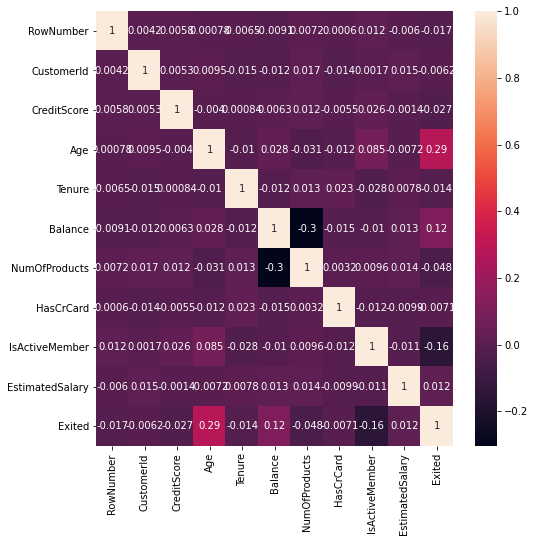

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

We can see there is no multicolinearity present in data hence we can drop those 
columns.

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# Separate numerical and categorical data

In [ ]:
# Numerical columns
df_num = df.select_dtypes(exclude=object)

In [ ]:
# Categorical columns
df_cat = df.select_dtypes(include=object)

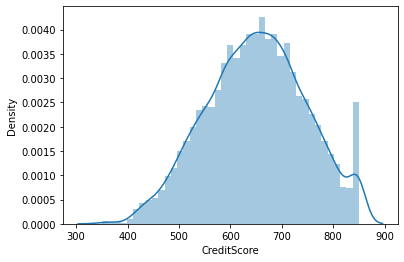

-0.07159586676212397


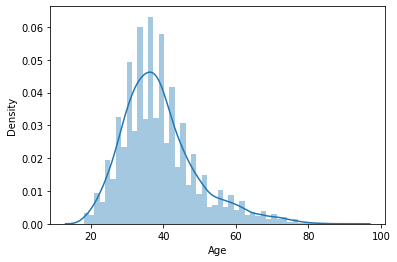

1.0111685586628079


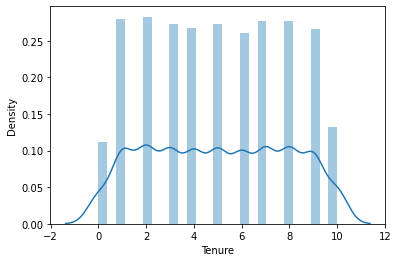

0.010989809189781041


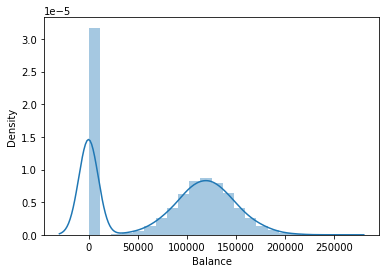

-0.14108754375291138


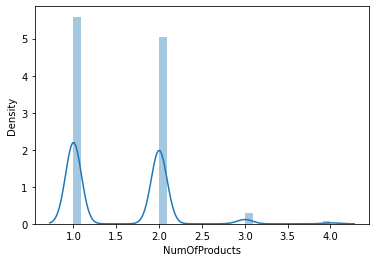

0.745456048438949


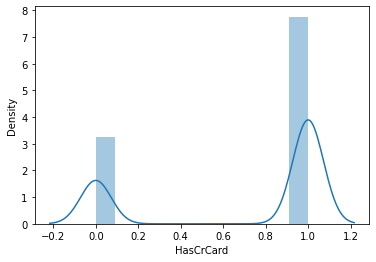

-0.9016763178640548


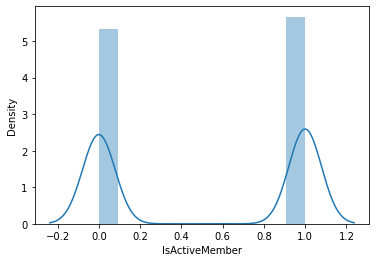

-0.06042756246298516


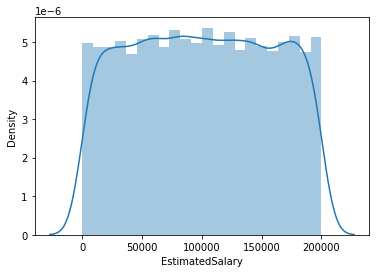

0.0020850448448748848


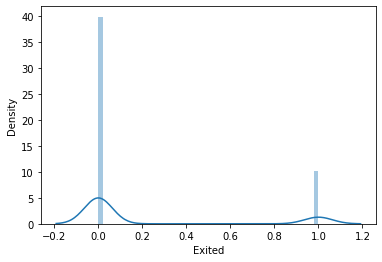

1.4713899141398699


In [ ]:
# Visualizing continuous variables
for col in df_num:
  plt.figure()
  sns.distplot(df_num[col])
  plt.show()
  print(skew(df_num[col]))

In [ ]:
for col in df_num:
 if skew(df_num[col])>0.5 or skew(df_num[col])<-0.5:
  df_num[col] = np.sqrt(df_num[col])

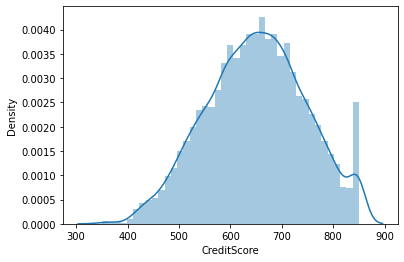

-0.07159586676212397


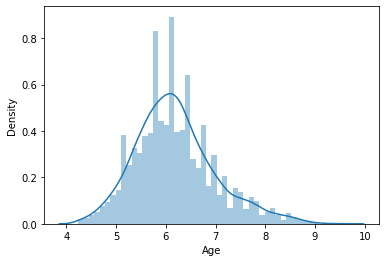

0.5933159623197802


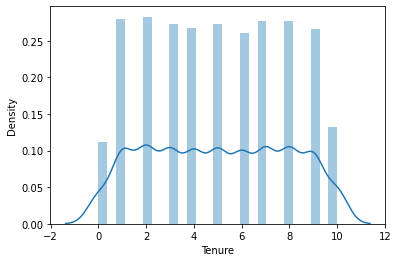

0.010989809189781041


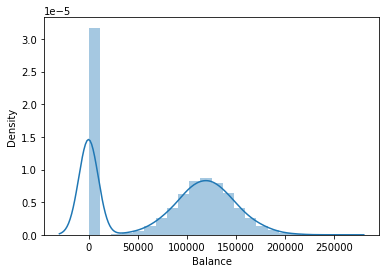

-0.14108754375291138


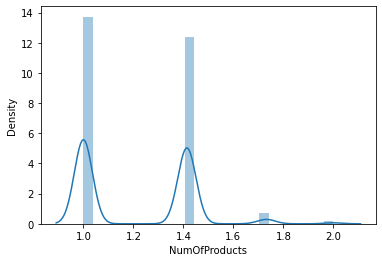

0.4204651463627845


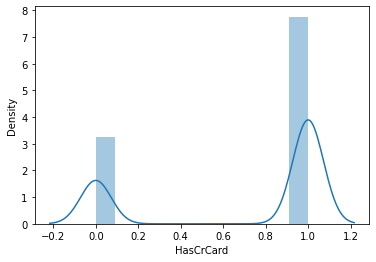

-0.9016763178640548


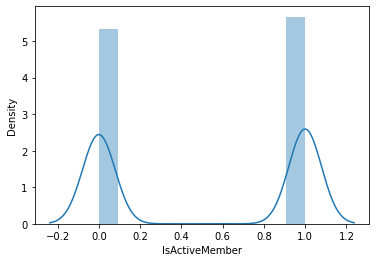

-0.06042756246298516


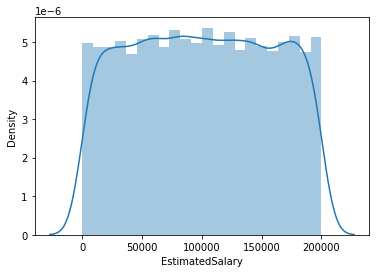

0.0020850448448748848


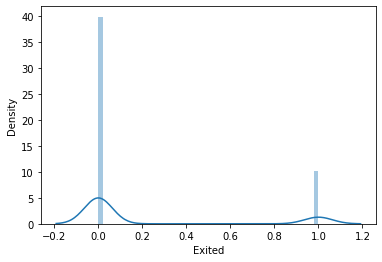

1.4713899141398699


In [ ]:
for col in df_num:
 plt.figure()
 sns.distplot(df_num[col])
 plt.show()
 print(skew(df_num[col]))

# Univariate Analysis

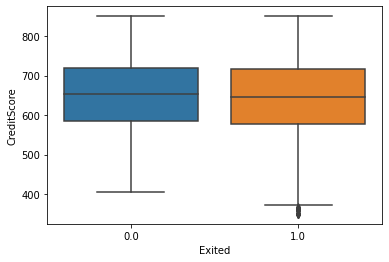

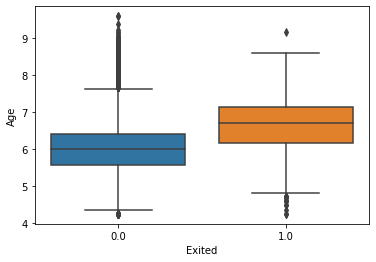

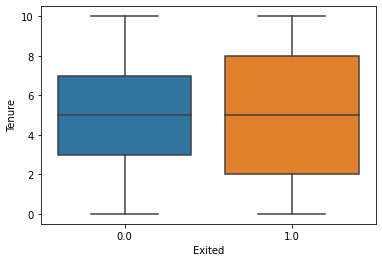

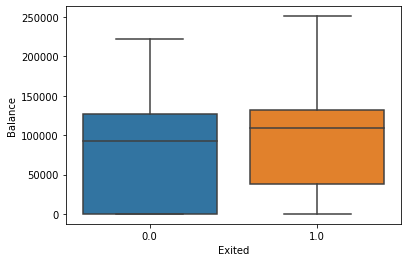

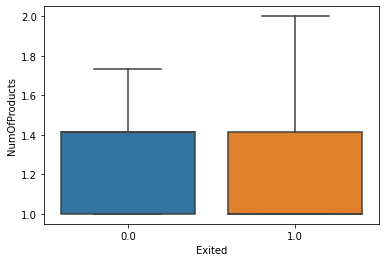

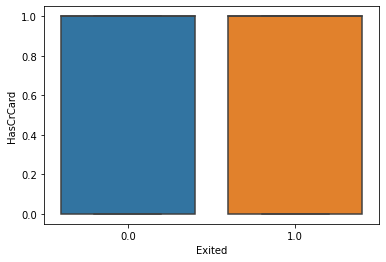

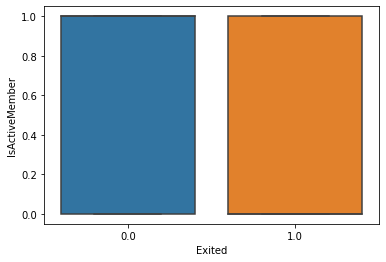

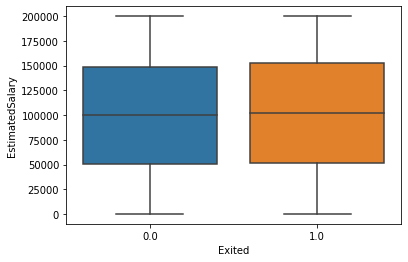

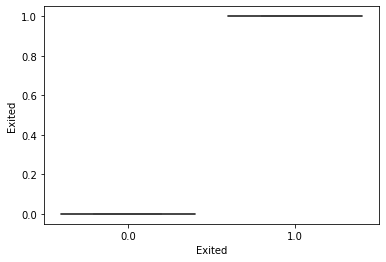

In [ ]:
for col in df_num:
 plt.figure()
 sns.boxplot(x='Exited',y = df_num[col],data=df_num)
 plt.show()

# We note the following:

1.There is no significant difference in the credit score distribution between retained and churned customers.

2.The older customers are churning at more than the younger ones alluding to     difference in service preference in the age categories. 
The bank may need to review their target market or review the strategy for retention between the different age groups.

3.Majority of customers have tenure between 1 to 9 .

4.Bank is loosing customers with significant bank balance.

5.bit_lengthMost of the customers have 1 or 2 products.

6.Majority of customers have credit cards.

7.he inactive members have a greater churn & also proportion of inactive members is also very high.

8.Estimated Salary does not have a significant on the possibility to churn.

In [ ]:
# visualizing categorical variables
df_cat.head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


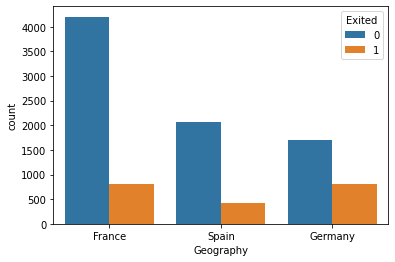

In [ ]:
plt.figure()
sns.countplot('Geography', hue = 'Exited', data = df)
plt.show()

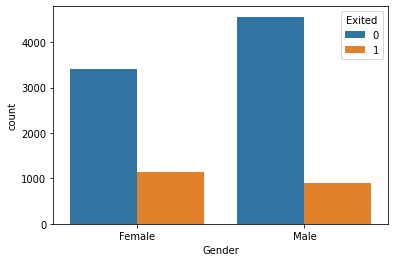

In [ ]:
plt.figure()
sns.countplot('Gender', hue = 'Exited', data = df)
plt.show()


# From above we can conclude that:-
1.Majority of the customers are from france but most customers which churned    are from germany

2.The proportion of female customers churning is also greater than that of male customers.

In [ ]:
# Encoding categorical variable
le = LabelEncoder()
for col in df_cat:
 df_cat[col]=le.fit_transform(df_cat[col])

In [ ]:
df_new = pd.concat([df_num,df_cat],axis=1)

In [ ]:
df_new.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography,Gender
0,619,6.480741,2,0.00,1.000000,1.0,1,101348.88,1.0,0,0
1,608,6.403124,1,83807.86,1.000000,0.0,1,112542.58,0.0,2,0
2,502,6.480741,8,159660.80,1.732051,1.0,0,113931.57,1.0,0,0
3,699,6.244998,1,0.00,1.414214,0.0,0,93826.63,0.0,0,0
4,850,6.557439,2,125510.82,1.000000,1.0,1,79084.10,0.0,2,0


In [ ]:
# creating features and label 
X = df_new.drop("Exited",axis=1)
y = df["Exited"]

In [ ]:
# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=1)

In [ ]:
# Scaling data
sc = StandardScaler()
X_train_ss = sc.fit_transform(X_train)
X_test_ss = sc.transform(X_test)

# Baseline model

In [ ]:
# initializing ann
base_model = Sequential()

In [ ]:
# adding the first input layer and the first hidden layer
base_model.add(Dense(8,input_shape=(X.shape[1],),activation = 'relu'))

In [ ]:
# adding the second hidden layer
base_model.add(Dense(8,activation='relu'))

In [ ]:
# adding third hidden layer
base_model.add(Dense(4,activation='relu'))

In [ ]:
# adding the output layer
base_model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
## model summary
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 88        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
base_model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [ ]:
base_model_history = base_model.fit(X_train_ss,y_train,batch_size = 10, epochs = 100,validation_data=(X_train_ss,y_train))

Epoch 1/100
700/700 [==============================] - 2s 2ms/step - loss: 0.6066 - val_loss: 0.4605
Epoch 2/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4511 - val_loss: 0.4268
Epoch 3/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4206 - val_loss: 0.4121
Epoch 4/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4045 - val_loss: 0.4066
Epoch 5/100
700/700 [==============================] - 1s 2ms/step - loss: 0.4071 - val_loss: 0.3983
Epoch 6/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3954 - val_loss: 0.3938
Epoch 7/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3856 - val_loss: 0.3887
Epoch 8/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3889 - val_loss: 0.3842
Epoch 9/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3733 - val_loss: 0.3802
Epoch 10/100
700/700 [==============================] - 1s 2ms/step - loss: 0.3809 - val_lo

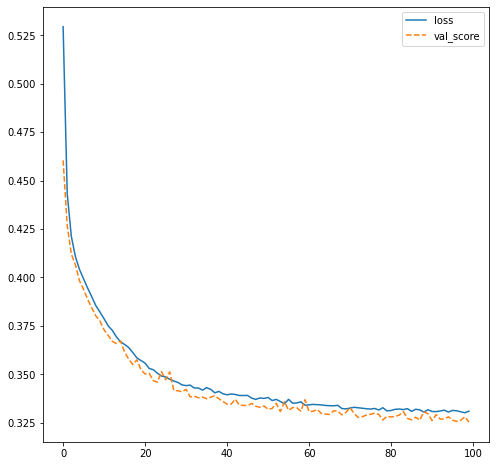

In [ ]:
fig , ax = plt.subplots(figsize=(8,8))
plt.plot(base_model_history.history['loss'], label='loss')
plt.plot(base_model_history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

In [ ]:
y_pred_base = base_model.predict(X_test_ss)

In [ ]:
y_pred_base = np.where(y_pred_base>0.5,1,0)

In [ ]:
print(classification_report(y_test,y_pred_base))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2373
           1       0.78      0.47      0.58       627

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



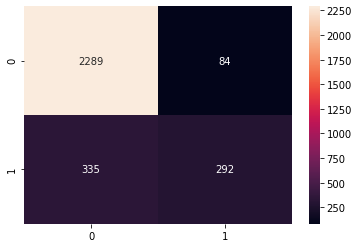

In [ ]:
mat = confusion_matrix(y_test,y_pred_base)
sns.heatmap(mat,annot=True,fmt='d')

Accuracy of model is 86%

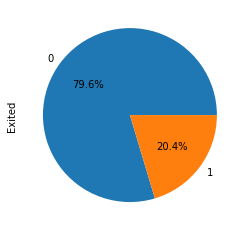

In [ ]:
y.value_counts().plot.pie(autopct="%.1f%%")

We can see that there is imbalanced data

# Handling imbalanced data

Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=1)

In [ ]:
X_sample_1,y_sample_1 = ros.fit_resample(X_train_ss,y_train)

In [ ]:
pd.Series(y_sample_1).value_counts()

1    5590
0    5590
dtype: int64

Undersampling


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus = RandomUnderSampler(random_state=1)

In [ ]:
X_sample_2,y_sample_2 = rus.fit_resample(X_train_ss,y_train)

In [ ]:
pd.Series(y_sample_2).value_counts()

1    1410
0    1410
dtype: int64

# Building ANN

ANN with Oversampling

In [ ]:
# initializing ann
model = Sequential()

In [ ]:
# adding the first input layer and the first hidden layer
model.add(Dense(8,input_shape=(X.shape[1],),activation = 'relu'))

In [ ]:
# adding the second hidden layer
model.add(Dense(8,activation='relu'))

In [ ]:
# adding third hidden layer
model.add(Dense(4,activation='relu'))

In [ ]:
# adding the output layer
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
## model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [ ]:
model_history = model.fit(X_sample_1,y_sample_1, batch_size = 10, epochs = 100,validation_data=(X_sample_1,y_sample_1))

Epoch 1/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.6505 - val_loss: 0.5473
Epoch 2/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.5349 - val_loss: 0.5035
Epoch 3/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.5061 - val_loss: 0.4918
Epoch 4/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.4953 - val_loss: 0.4843
Epoch 5/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.4880 - val_loss: 0.4801
Epoch 6/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.4730 - val_loss: 0.4771
Epoch 7/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.4792 - val_loss: 0.4741
Epoch 8/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.4739 - val_loss: 0.4719
Epoch 9/100
1118/1118 [==============================] - 2s 2ms/step - loss: 0.4671 - val_loss: 0.4706
Epoch 10/100
1118/1118 [==============================] - 2s 2ms/step - l

Visualizing Training and Validation Loss

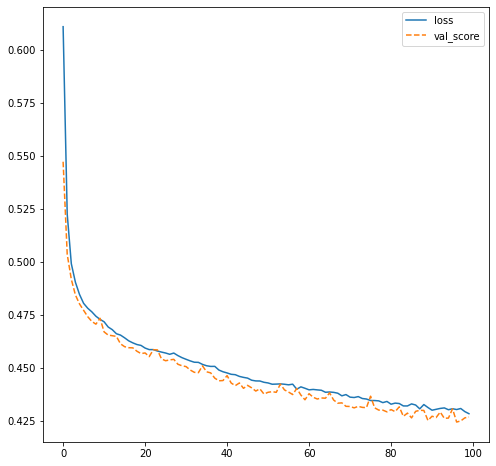

In [ ]:
fig , ax = plt.subplots(figsize=(8,8))
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

In [ ]:
y_pred = model.predict(X_test_ss)

In [ ]:
y_pred = np.where(y_pred>0.5,1,0)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.76      0.84      2373
           1       0.46      0.75      0.57       627

    accuracy                           0.76      3000
   macro avg       0.69      0.76      0.70      3000
weighted avg       0.82      0.76      0.78      3000



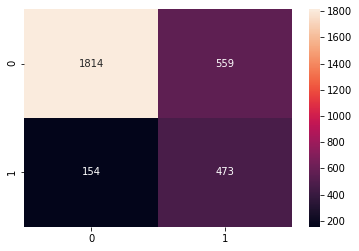

In [ ]:
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat,annot=True,fmt='d')

### ANN with undersampling


In [ ]:
# initializing ann
model1 = Sequential()

In [ ]:
# adding the first input layer and the first hidden layer
model1.add(Dense(8,input_shape=(X.shape[1],),activation = 'relu'))

In [ ]:
# adding the second hidden layer
model1.add(Dense(8,activation='relu'))

In [ ]:
# adding third hidden layer
model1.add(Dense(4,activation='relu'))

In [ ]:
# adding the output layer
model1.add(Dense(1,activation = 'sigmoid'))

In [ ]:
## model summary
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 5         
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
## Compiling model

In [ ]:
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy')

In [ ]:
model1_history = model1.fit(X_sample_2,y_sample_2, batch_size = 10, epochs = 100,validation_data=(X_sample_2,y_sample_2))

Epoch 1/100
282/282 [==============================] - 1s 2ms/step - loss: 0.6930 - val_loss: 0.6481
Epoch 2/100
282/282 [==============================] - 0s 2ms/step - loss: 0.6465 - val_loss: 0.6240
Epoch 3/100
282/282 [==============================] - 0s 2ms/step - loss: 0.6191 - val_loss: 0.6019
Epoch 4/100
282/282 [==============================] - 0s 2ms/step - loss: 0.5939 - val_loss: 0.5731
Epoch 5/100
282/282 [==============================] - 0s 2ms/step - loss: 0.5645 - val_loss: 0.5488
Epoch 6/100
282/282 [==============================] - 1s 2ms/step - loss: 0.5486 - val_loss: 0.5319
Epoch 7/100
282/282 [==============================] - 0s 2ms/step - loss: 0.5318 - val_loss: 0.5148
Epoch 8/100
282/282 [==============================] - 0s 2ms/step - loss: 0.5055 - val_loss: 0.5057
Epoch 9/100
282/282 [==============================] - 0s 2ms/step - loss: 0.5273 - val_loss: 0.4999
Epoch 10/100
282/282 [==============================] - 0s 2ms/step - loss: 0.5013 - val_lo

## Visualizing Training and Validation Loss

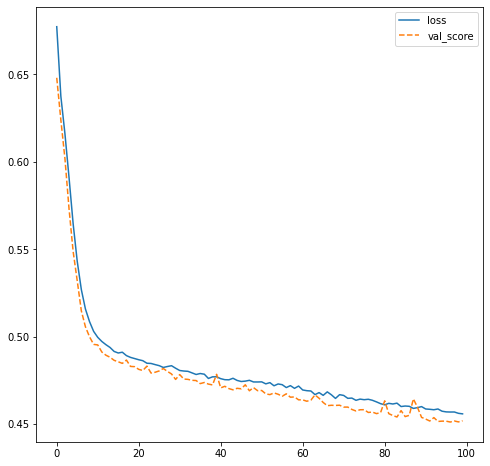

In [ ]:
fig , ax = plt.subplots(figsize=(8,8))
plt.plot(model1_history.history['loss'], label='loss')
plt.plot(model1_history.history['val_loss'],label='val_score',linestyle='--')
plt.legend()

In [ ]:
y_pred1 = model1.predict(X_test_ss)

In [ ]:
y_pred1 = np.where(y_pred1>0.5,1,0)

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85      2373
           1       0.48      0.71      0.57       627

    accuracy                           0.78      3000
   macro avg       0.69      0.75      0.71      3000
weighted avg       0.82      0.78      0.79      3000



Results And Conclusion

The dataset is Visualized based on different criterion. The prediction of customer Churn is performed using ANN(Undersampling, Oversampling) & Baseline model. For oversampling we get accuracy of 78% and using undersampling with accuracy of 75% but in Baseline model we get Accuracy of 86%.